#  PROBLEM STATEMENT

The objective of this case study is to help Delhivery builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors . Also understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it


In [219]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mat
import geopandas as gpd
import shapefile as shp
from shapely.geometry import Point
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from statsmodels.graphics.gofplots import qqplot,qqline
from scipy.stats import probplot,shapiro,levene
from scipy.stats import mannwhitneyu,ttest_ind,f_oneway

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("delhivery_dataset.txt")

In [4]:
df=data.copy()

In [5]:
data.shape

(144867, 24)

In [6]:
#percentage of missing values in each features
missing_data_per=round((df.isna().sum()/len(df))*100,3)
missing_data_per.sort_values(ascending=False)

source_name                       0.202
destination_name                  0.180
segment_factor                    0.000
segment_osrm_distance             0.000
trip_creation_time                0.000
route_schedule_uuid               0.000
route_type                        0.000
trip_uuid                         0.000
source_center                     0.000
destination_center                0.000
od_start_time                     0.000
od_end_time                       0.000
start_scan_to_end_scan            0.000
is_cutoff                         0.000
cutoff_factor                     0.000
cutoff_timestamp                  0.000
actual_distance_to_destination    0.000
actual_time                       0.000
osrm_time                         0.000
osrm_distance                     0.000
factor                            0.000
segment_actual_time               0.000
segment_osrm_time                 0.000
data                              0.000
dtype: float64

Since missing values are very less in percentage even less than 1%, we will drop this missing values from dataset.

In [7]:
df.dropna(how='any',inplace=True)

In [8]:
print(df.isna().sum())

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64


In [9]:
df.shape

(144316, 24)

In [10]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
mean,963.697698,233.561345,234.708498,417.996237,214.437055,285.549785,2.120178,36.175379,18.495697,22.818993,2.218707
std,1038.082976,345.245823,345.480571,598.940065,308.448543,421.717826,1.717065,53.524298,14.774008,17.866367,4.854804
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.000000,-23.444444
25%,161.000000,22.000000,23.352027,51.000000,27.000000,29.896250,1.604545,20.000000,11.000000,12.053975,1.347826
50%,451.000000,66.000000,66.135322,132.000000,64.000000,78.624400,1.857143,28.000000,17.000000,23.508300,1.684211
75%,1645.000000,286.000000,286.919294,516.000000,259.000000,346.305400,2.212280,40.000000,22.000000,27.813325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.403700,574.250000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144316 non-null  object 
 1   trip_creation_time              144316 non-null  object 
 2   route_schedule_uuid             144316 non-null  object 
 3   route_type                      144316 non-null  object 
 4   trip_uuid                       144316 non-null  object 
 5   source_center                   144316 non-null  object 
 6   source_name                     144316 non-null  object 
 7   destination_center              144316 non-null  object 
 8   destination_name                144316 non-null  object 
 9   od_start_time                   144316 non-null  object 
 10  od_end_time                     144316 non-null  object 
 11  start_scan_to_end_scan          144316 non-null  float64
 12  is_cutoff       

Converting date columns to datetime datatype

In [12]:
df[['trip_creation_time','od_start_time','od_end_time','cutoff_timestamp']]=df[['trip_creation_time','od_start_time','od_end_time','cutoff_timestamp']].apply(pd.to_datetime)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetim

In [14]:
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57.000000,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55.000000,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [15]:
df.describe(include='object')

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name
count,144316,144316,144316,144316,144316,144316,144316,144316
unique,2,1497,2,14787,1496,1496,1466,1466
top,training,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153733005409156789,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,104632,1812,99132,101,23267,23267,15192,15192


Since we have columns with unknown fields , we will drop such columns.

In [16]:
unknown_fields = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
df = df.drop(columns = unknown_fields)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetim

In [18]:
df['handling_time_days'] = (df['od_end_time'] - df['od_start_time']).dt.total_seconds() / 60 / 60 

In [19]:
df[['actual_time','od_start_time','od_end_time','handling_time_days']].head(20)

,actual_time,od_start_time,od_end_time,handling_time_days
0,14.0,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.436894
1,24.0,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.436894
2,40.0,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.436894
3,62.0,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.436894
4,68.0,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,1.436894
5,15.0,2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,1.819553
6,44.0,2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,1.819553
7,65.0,2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,1.819553
8,76.0,2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,1.819553
9,102.0,2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,1.819553


## GROUPING OF COLUMNS 

# Calculate the time taken between od_start_time and od_end_time .

In [20]:
df['od_total_time'] = df['od_end_time'] - df['od_start_time']
df.drop(columns = ['od_end_time', 'od_start_time'], inplace = True)
df['od_total_time'] = df['od_total_time'].apply(lambda x : round(x.total_seconds() / 60.0, 2))
df['od_total_time'].head()

0    86.21
1    86.21
2    86.21
3    86.21
4    86.21
Name: od_total_time, dtype: float64

In [21]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'handling_time_days', 'od_total_time'],
      dtype='object')

In [243]:
agg_dict = {'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'source_name' : 'first',
    'destination_name' : 'last',
    'start_scan_to_end_scan' : 'sum',
    'od_total_time' : 'sum', 
    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',
    'segment_actual_time' : 'sum',
    'segment_osrm_time' : 'sum',
    'segment_osrm_distance':'sum'
}

In [244]:
gdf = df.groupby(['trip_uuid', 'source_center', 'destination_center']).agg(agg_dict).reset_index()
print(f'length of data before groupig : {df.shape[0]}')
print(f'length of data after groupig : {len(gdf)}')
gdf.head(10)

length of data before groupig : 144316
length of data after groupig : 26222


,trip_uuid,source_center,destination_center,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,start_scan_to_end_scan,od_total_time,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),22680.0,22690.80,3778.765471,6484.0,3464.0,4540.1261,728.0,534.0,670.6205
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),20979.0,20989.71,5082.046634,9198.0,4323.0,6037.6386,820.0,474.0,649.8528
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),174.0,176.49,53.310332,96.0,55.0,60.3157,46.0,26.0,28.1995
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),732.0,736.68,186.897974,303.0,155.0,209.1151,95.0,39.0,55.9899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),10008.0,10015.68,1725.590250,2601.0,1427.0,1975.7409,608.0,231.0,317.7408
5,trip-153671043369099517,IND562132AAA,IND000000ACB,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),238623.0,238678.44,66437.911988,109624.0,64341.0,87471.5079,2700.0,1710.0,2227.5270
6,trip-153671046011330457,IND400072AAB,IND401104AAA,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),200.0,200.98,28.529648,82.0,24.0,31.6475,59.0,16.0,19.8766
7,trip-153671052974046625,IND583101AAA,IND583201AAA,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,Bellary_Dc (Karnataka),Hospet (Karnataka),456.0,456.03,126.281660,277.0,97.0,135.0342,147.0,45.0,63.6461
8,trip-153671052974046625,IND583119AAA,IND583101AAA,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),970.0,971.58,63.783978,182.0,62.0,78.0984,130.0,44.0,53.5761
9,trip-153671052974046625,IND583201AAA,IND583119AAA,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,Hospet (Karnataka),Sandur_WrdN1DPP_D (Karnataka),160.0,161.08,48.941666,97.0,48.0,53.1588,63.0,26.0,29.5697


#After grouping, we can see how the total number of rows has decreased.

In [245]:
print('----------After Grouping----------')
gdf.loc[gdf['trip_uuid']=='trip-153671041653548748']

----------After Grouping----------


,trip_uuid,source_center,destination_center,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,start_scan_to_end_scan,od_total_time,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),22680.0,22690.80,3778.765471,6484.0,3464.0,4540.1261,728.0,534.0,670.6205
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),20979.0,20989.71,5082.046634,9198.0,4323.0,6037.6386,820.0,474.0,649.8528


In [246]:
df[df['trip_uuid']=='trip-153741093647649320']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,handling_time_days,od_total_time
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,1.436894,86.21
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,1.436894,86.21
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,1.436894,86.21
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,1.436894,86.21
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,1.436894,86.21
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),109.0,10.403038,15.0,11.0,12.1171,15.0,11.0,12.1171,1.819553,109.17
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),109.0,18.045481,44.0,17.0,21.2890,28.0,6.0,9.1719,1.819553,109.17
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),109.0,28.061896,65.0,29.0,35.8252,21.0,11.0,14.5362,1.819553,109.17
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),109.0,38.939167,76.0,39.0,47.1900,10.0,10.0,11.3648,1.819553,109.17
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),109.0,43.595802,102.0,45.0,53.2334,26.0,6.0,6.0434,1.819553,109.17


In [247]:
agg_dict1 = {'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',
    'destination_center' : 'last',
    'destination_name' : 'last',
    'start_scan_to_end_scan' : 'sum',
    'od_total_time' : 'sum', 
    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',
    'segment_actual_time' : 'sum',
    'segment_osrm_time' : 'sum',
    'segment_osrm_distance' : 'sum'
}

In [248]:
gdf1=df.groupby(by='trip_uuid').agg(agg_dict1).reset_index()
gdf1

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_total_time,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),43659.0,43680.51,8860.812105,15682.0,7787.0,10577.7647,1548.0,1008.0,1320.4733
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),906.0,913.17,240.208306,399.0,210.0,269.4308,141.0,65.0,84.1894
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),248631.0,248694.12,68163.502238,112225.0,65768.0,89447.2488,3308.0,1941.0,2545.2678
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),200.0,200.98,28.529648,82.0,24.0,31.6475,59.0,16.0,19.8766
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),1586.0,1588.69,239.007304,556.0,207.0,266.2914,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),876.0,879.33,141.057373,186.0,148.0,162.9473,82.0,62.0,64.8551
14783,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),120.0,121.18,25.130640,33.0,19.0,26.5333,21.0,11.0,16.0883
14784,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),1263.0,1266.36,93.743842,549.0,134.0,162.8499,281.0,88.0,104.8866
14785,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),1315.0,1320.44,355.281673,600.0,446.0,449.5383,258.0,221.0,223.5324


# Building some features to prepare the data for actual analysis

## Spliting source name

In [249]:
print(df[['source_name']])
total_unique_source=df['source_name'].nunique()
print("The total unique source name is : ",total_unique_source)
df['source_name'].unique()

                       source_name
0       Anand_VUNagar_DC (Gujarat)
1       Anand_VUNagar_DC (Gujarat)
2       Anand_VUNagar_DC (Gujarat)
3       Anand_VUNagar_DC (Gujarat)
4       Anand_VUNagar_DC (Gujarat)
...                            ...
144862  Sonipat_Kundli_H (Haryana)
144863  Sonipat_Kundli_H (Haryana)
144864  Sonipat_Kundli_H (Haryana)
144865  Sonipat_Kundli_H (Haryana)
144866  Sonipat_Kundli_H (Haryana)

[144316 rows x 1 columns]
The total unique source name is :  1496


array(['Anand_VUNagar_DC (Gujarat)', 'Khambhat_MotvdDPP_D (Gujarat)',
       'Bhiwandi_Mankoli_HB (Maharashtra)', ...,
       'Dwarka_StnRoad_DC (Gujarat)', 'Bengaluru_Nelmngla_L (Karnataka)',
       'Kulithalai_AnnaNGR_D (Tamil Nadu)'], dtype=object)

It is very visible that the data in source name has 3 parts:

 --> At start its a location name followed by city code and then in bracket, we have state name.
 
 We will split these 3 data in new columns.

In [250]:
#y=df['source_name']
def split_state(x):
    temp=x.split('(')
    
    return temp[-1].replace(')','')
#d=y.apply(split_state)
#print(d.unique())
    

In [251]:
#y=df['source_name']
def split_city(x):
    city = x.split(' (')[0]
    city = city.split('_')[0]
    if city=='CCU':
        return 'Kolkata'
    if city=='HBR' or city=='BLR':
        return 'Bengaluru'
    if city=='PNQ':
        return 'Pune'
    if city.upper()=='CJB':
        return 'Coimbatore'
    if city=='FBD':
        return 'Faridabad'
    if city=='GGN':
        return 'Gurgaon'
    if city=='AMD':
        return 'Ahmedabad'
    if city=='GZB':
        return 'Gaziabad'
    if city=='DEL':
        return 'Delhi'
    return city

#d=y.apply(split_city)
#print(d.unique())

In [252]:
def split_place(x):
    x = x.split('(')[0]
    len1 = len(x.split('_'))

    if len1 >= 3:
        return x.split('_')[1]
    if len1 == 2:
        return x.split('_')[0]

    return x.split(' ')[0]
    
def split_code(x):
    x = x.split('(')[0]

    if len(x.split('_')) >= 3:
        return x.split('_')[-1]

    return 'none'

In [253]:
gdf1['source_state'] = gdf1['source_name'].apply(split_state)
gdf1['source_city'] = gdf1['source_name'].apply(split_city)
gdf1['source_place'] = gdf1['source_name'].apply(split_place)
gdf1['source_code'] = gdf1['source_name'].apply(split_code)

In [33]:
# gdf1['source_state'] = gdf1['source_name'].apply(split_state)
# gdf1['source_state'].unique()

# gdf1['source_city'] = gdf1['source_name'].apply(split_city)
# print('No of source cities :', gdf1['source_city'].nunique())
# gdf1['source_city'].unique()[:20]

# gdf1['source_place'] = gdf1['source_name'].apply(split_place)
# gdf1['source_place'].unique()[:20]

# gdf1['source_code'] = gdf1['source_name'].apply(split_code)
# gdf1['source_code'].unique()[:20]

Similarly we will split destination name .

In [254]:
print(df[['destination_name']])
total_unique_destination=df['destination_name'].nunique()
print("The total unique destination name is : ",total_unique_destination)
df['destination_name'].unique()

                     destination_name
0       Khambhat_MotvdDPP_D (Gujarat)
1       Khambhat_MotvdDPP_D (Gujarat)
2       Khambhat_MotvdDPP_D (Gujarat)
3       Khambhat_MotvdDPP_D (Gujarat)
4       Khambhat_MotvdDPP_D (Gujarat)
...                               ...
144862  Gurgaon_Bilaspur_HB (Haryana)
144863  Gurgaon_Bilaspur_HB (Haryana)
144864  Gurgaon_Bilaspur_HB (Haryana)
144865  Gurgaon_Bilaspur_HB (Haryana)
144866  Gurgaon_Bilaspur_HB (Haryana)

[144316 rows x 1 columns]
The total unique destination name is :  1466


array(['Khambhat_MotvdDPP_D (Gujarat)', 'Anand_Vaghasi_IP (Gujarat)',
       'Pune_Tathawde_H (Maharashtra)', ...,
       'Chennai_Mylapore (Tamil Nadu)', 'Naraingarh_Ward2DPP_D (Haryana)',
       'Mumbai_Ghansoli_DC (Maharashtra)'], dtype=object)

## Spliting destination name

In [255]:
gdf1['destination_state'] = gdf1['destination_name'].apply(split_state)
gdf1['destination_city'] = gdf1['destination_name'].apply(split_city)
gdf1['destination_place'] = gdf1['destination_name'].apply(split_place)
gdf1['destination_code'] = gdf1['destination_name'].apply(split_code)

In [256]:
gdf1[['destination_state','destination_city','destination_place','destination_code']]

,destination_state,destination_city,destination_place,destination_code
0,Haryana,Gurgaon,Bilaspur,HB
1,Karnataka,Chikblapur,ShntiSgr,D
2,Punjab,Chandigarh,Mehmdpur,H
3,Maharashtra,Mumbai,MiraRd,IP
4,Karnataka,Bellary,Bellary,none
...,...,...,...,...
14782,Punjab,Chandigarh,Mehmdpur,H
14783,Haryana,Faridabad,Blbgarh,DC
14784,Uttar Pradesh,Kanpur,Central,6
14785,Tamil Nadu,Tirunelveli,VdkkuSrt,I


In [257]:
gdf1[['source_state','source_city','source_place','source_code']]

,source_state,source_city,source_place,source_code
0,Madhya Pradesh,Bhopal,Trnsport,H
1,Karnataka,Tumkur,Veersagr,I
2,Karnataka,Bangalore,Nelmngla,H
3,Maharashtra,Mumbai Hub,Mumbai,none
4,Karnataka,Bellary,Bellary,none
...,...,...,...,...
14782,Punjab,Chandigarh,Mehmdpur,H
14783,Haryana,Faridabad,Balabhgarh,DPC
14784,Uttar Pradesh,Kanpur,Central,6
14785,Tamil Nadu,Tirunelveli,VdkkuSrt,I


In [258]:
#Now the total number of columns 
gdf1.shape[1]

26

## Trip_creation_time: Extract features like month, year and day etc

In [259]:
gdf1['trip_year'] =  gdf1['trip_creation_time'].dt.year
gdf1['trip_month'] = gdf1['trip_creation_time'].dt.month
gdf1['trip_hour'] =  gdf1['trip_creation_time'].dt.hour
gdf1['trip_day'] =   gdf1['trip_creation_time'].dt.day
gdf1['trip_week'] =  gdf1['trip_creation_time'].dt.isocalendar().week
gdf1['trip_dayofweek'] = gdf1['trip_creation_time'].dt.dayofweek

In [260]:
gdf1[['trip_year','trip_month','trip_hour','trip_day','trip_week','trip_dayofweek']]

,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,2018,9,0,12,37,2
1,2018,9,0,12,37,2
2,2018,9,0,12,37,2
3,2018,9,0,12,37,2
4,2018,9,0,12,37,2
...,...,...,...,...,...,...
14782,2018,10,23,3,40,2
14783,2018,10,23,3,40,2
14784,2018,10,23,3,40,2
14785,2018,10,23,3,40,2


In [261]:
print("The no of rows after cleaning of data : ",gdf1.shape[0])
print("The no of features after cleaning of data : ",gdf1.shape[1])

The no of rows after cleaning of data :  14787
The no of features after cleaning of data :  32


In [262]:
gdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14787 non-null  object        
 1   data                            14787 non-null  object        
 2   trip_creation_time              14787 non-null  datetime64[ns]
 3   route_schedule_uuid             14787 non-null  object        
 4   route_type                      14787 non-null  object        
 5   source_center                   14787 non-null  object        
 6   source_name                     14787 non-null  object        
 7   destination_center              14787 non-null  object        
 8   destination_name                14787 non-null  object        
 9   start_scan_to_end_scan          14787 non-null  float64       
 10  od_total_time                   14787 non-null  float64       
 11  ac

# Univariate Analysis

In [263]:
ddf=gdf1[['trip_year','trip_month','trip_hour','trip_day','trip_week','trip_dayofweek']]

In [264]:
ddf['bins'] = pd.cut(x=ddf['trip_hour'], bins=[0, 3, 10, 16,20,23],
                      labels=['Midnight', 'Morning', 'Afternoon','Evening', 'Night'])
ddf.drop(columns = ['trip_hour'], inplace = True)
ddf.rename(columns = {'bins':'trip_hour'}, inplace = True)

In [265]:
ddf['trip_week'].value_counts()

38    5001
39    4402
37    3608
40    1776
Name: trip_week, dtype: Int64

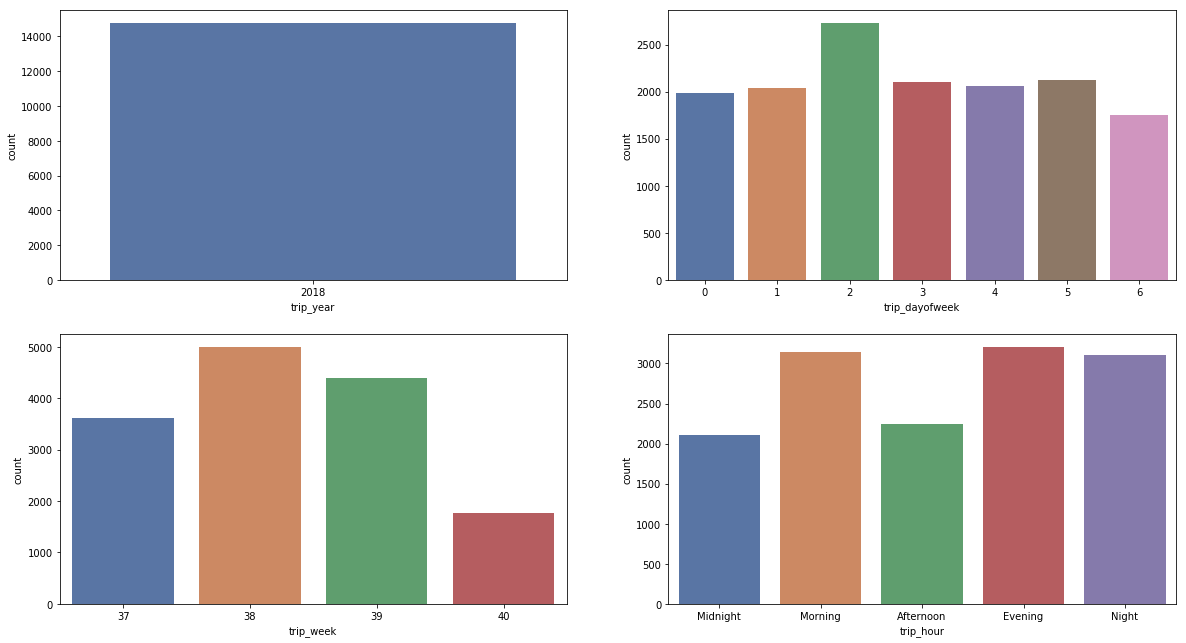

In [266]:
#date_cols = ['trip_year','trip_dayofweek','trip_week','trip_hour']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.countplot(ddf['trip_year'], x='start_scan_to_end_scan', palette='deep', ax=axs[0,0])
sns.countplot(ddf['trip_dayofweek'], x='actual_distance_to_destination', palette='deep', ax=axs[0,1])
sns.countplot(ddf['trip_week'], x='actual_time', palette='deep', ax=axs[1,0])
sns.countplot(ddf['trip_hour'], x='osrm_time', palette='deep', ax=axs[1,1])
plt.show()

The data we have is of 2018 and that too of 4 weeks only i.e week 37,38,39,40.

All days of the week have almost same number of booking so no trends here.

Week 40 sees fewer number of bookings than the previous weeks.

Customer prefer comparatively less booking in midnight and in afternoon. however no trends here too.

# Distribution of trip data

In [267]:
df_data=gdf1.groupby('data')['trip_uuid'].count().to_frame().reset_index()
df_data['perc']=round((df_data['trip_uuid']*100)/df_data['trip_uuid'].sum(),2)
df_data

,data,trip_uuid,perc
0,test,4142,28.01
1,training,10645,71.99


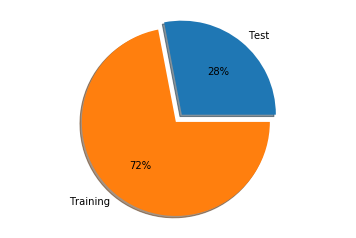

In [268]:
plt.pie(df_data['trip_uuid'],labels=['Test','Training'],autopct='%.0f%%',explode = [0, 0.1],shadow=True)
plt.axis('equal')
plt.show()

In [269]:
df_route = gdf1.groupby(by = 'route_type')['trip_uuid'].count().to_frame().reset_index()
df_route['perc'] = np.round(df_route['trip_uuid'] * 100/ df_route['trip_uuid'].sum(), 2)
df_route.head()

,route_type,trip_uuid,perc
0,Carting,8906,60.23
1,FTL,5881,39.77


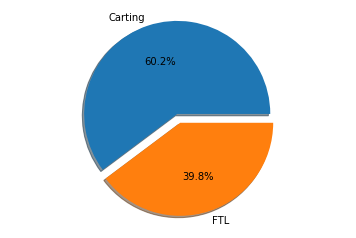

In [270]:
plt.pie(df_route['trip_uuid'],labels=['Carting','FTL'],autopct='%.01f%%',explode = [0, 0.1],shadow=True)
plt.axis('equal')
plt.show()

Testing has 28% data and training has 72% of data ,that's a standard norm also.

Carting has higher chunks of booking than FTL.

# Bivariate analysis

In [271]:
df_source_state = gdf1.groupby(by = 'source_state')['trip_uuid'].count().to_frame().reset_index()
df_source_state['perc'] = np.round(df_source_state['trip_uuid'] * 100/ df_source_state['trip_uuid'].sum(), 2)
df_source_state = df_source_state.sort_values(by = 'trip_uuid', ascending = False)
df_source_state

,source_state,trip_uuid,perc
17,Maharashtra,2682,18.14
14,Karnataka,2229,15.07
10,Haryana,1669,11.29
24,Tamil Nadu,1085,7.34
7,Delhi,790,5.34
25,Telangana,779,5.27
9,Gujarat,746,5.04
26,Uttar Pradesh,719,4.86
28,West Bengal,677,4.58
22,Punjab,630,4.26


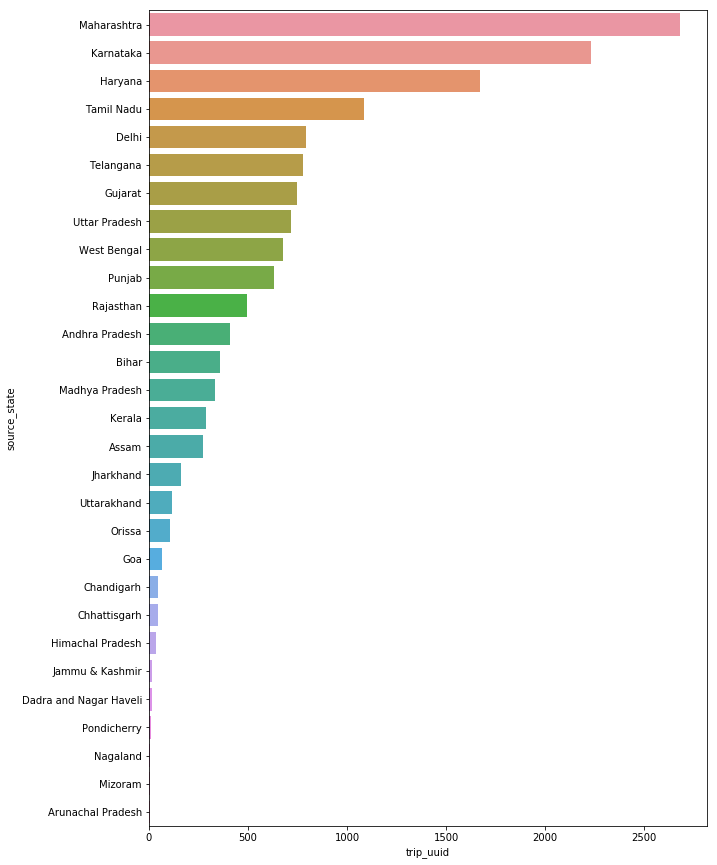

In [272]:
plt.figure(figsize = (10, 15))
sns.barplot(data = df_source_state, 
            x = df_source_state['trip_uuid'], 
            y = df_source_state['source_state'])
plt.show()

In [273]:
fp = r'C:\Users\hp\Desktop\ML_notes\Delhivery Feature engineer Case\Maps_with_python-master\india-polygon.shp'
map_df = gpd.read_file(fp) 
map_df_copy = gpd.read_file(fp)
map_df.head()

,id,st_nm,geometry
0,None,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,None,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,None,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,None,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


In [274]:
merged = map_df.set_index('st_nm').join(df_source_state.set_index('source_state'))
merged['Count'] = merged['trip_uuid'].replace(np.nan, 0)
merged.head()

,id,geometry,trip_uuid,perc,Count
st_nm,,,,,
Andaman and Nicobar Islands,None,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",NaN,NaN,0.0
Arunachal Pradesh,None,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",4.0,0.03,4.0
Assam,None,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",273.0,1.85,273.0
Bihar,None,"POLYGON ((88.11357 26.54028, 88.28006 26.37640...",358.0,2.42,358.0
Chandigarh,None,"POLYGON ((76.84208 30.76124, 76.83758 30.72552...",48.0,0.32,48.0


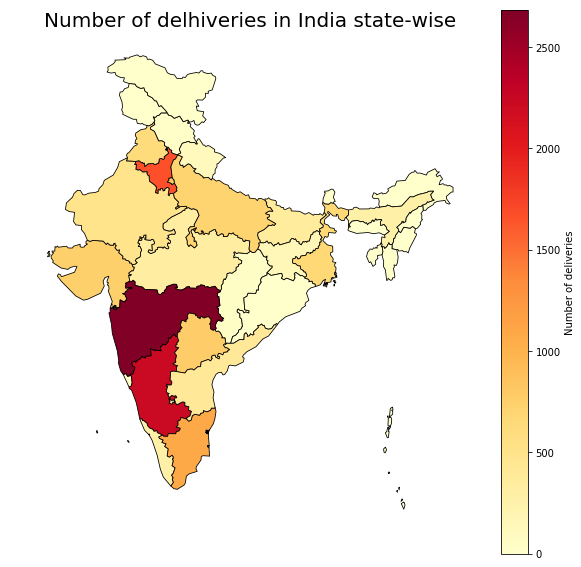

In [275]:
#Create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Number of delhiveries in India state-wise', fontdict={'fontsize': '20', 'fontweight' : '10'})
# Plot the figure
merged.plot(column='Count',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Number of deliveries"})


In [276]:
df_source_city = gdf1.groupby(by = 'source_city')['trip_uuid'].count().to_frame().reset_index()
df_source_city['perc'] = np.round(df_source_city['trip_uuid'] * 100/ df_source_city['trip_uuid'].sum(), 2)
df_source_city = df_source_city.sort_values(by = 'trip_uuid', ascending = False)[:30]
df_source_city.head()

,source_city,trip_uuid,perc
82,Bengaluru,1051,7.11
228,Gurgaon,1039,7.03
102,Bhiwandi,811,5.48
59,Bangalore,755,5.11
165,Delhi,617,4.17


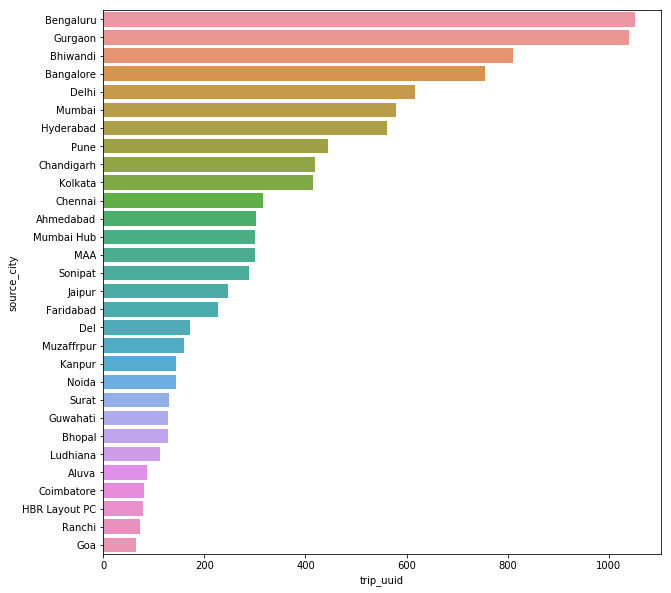

In [277]:
plt.figure(figsize = (10, 10))
sns.barplot(data = df_source_city, 
            x = df_source_city['trip_uuid'], 
            y = df_source_city['source_city'])
plt.show()

# Multivariate Analysis

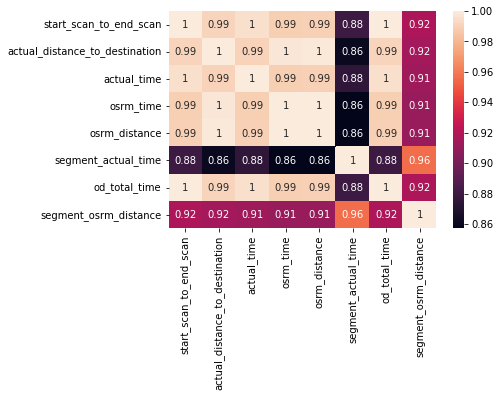

In [321]:
sns.heatmap(gdf1[num_cols1].corr(),annot=True)

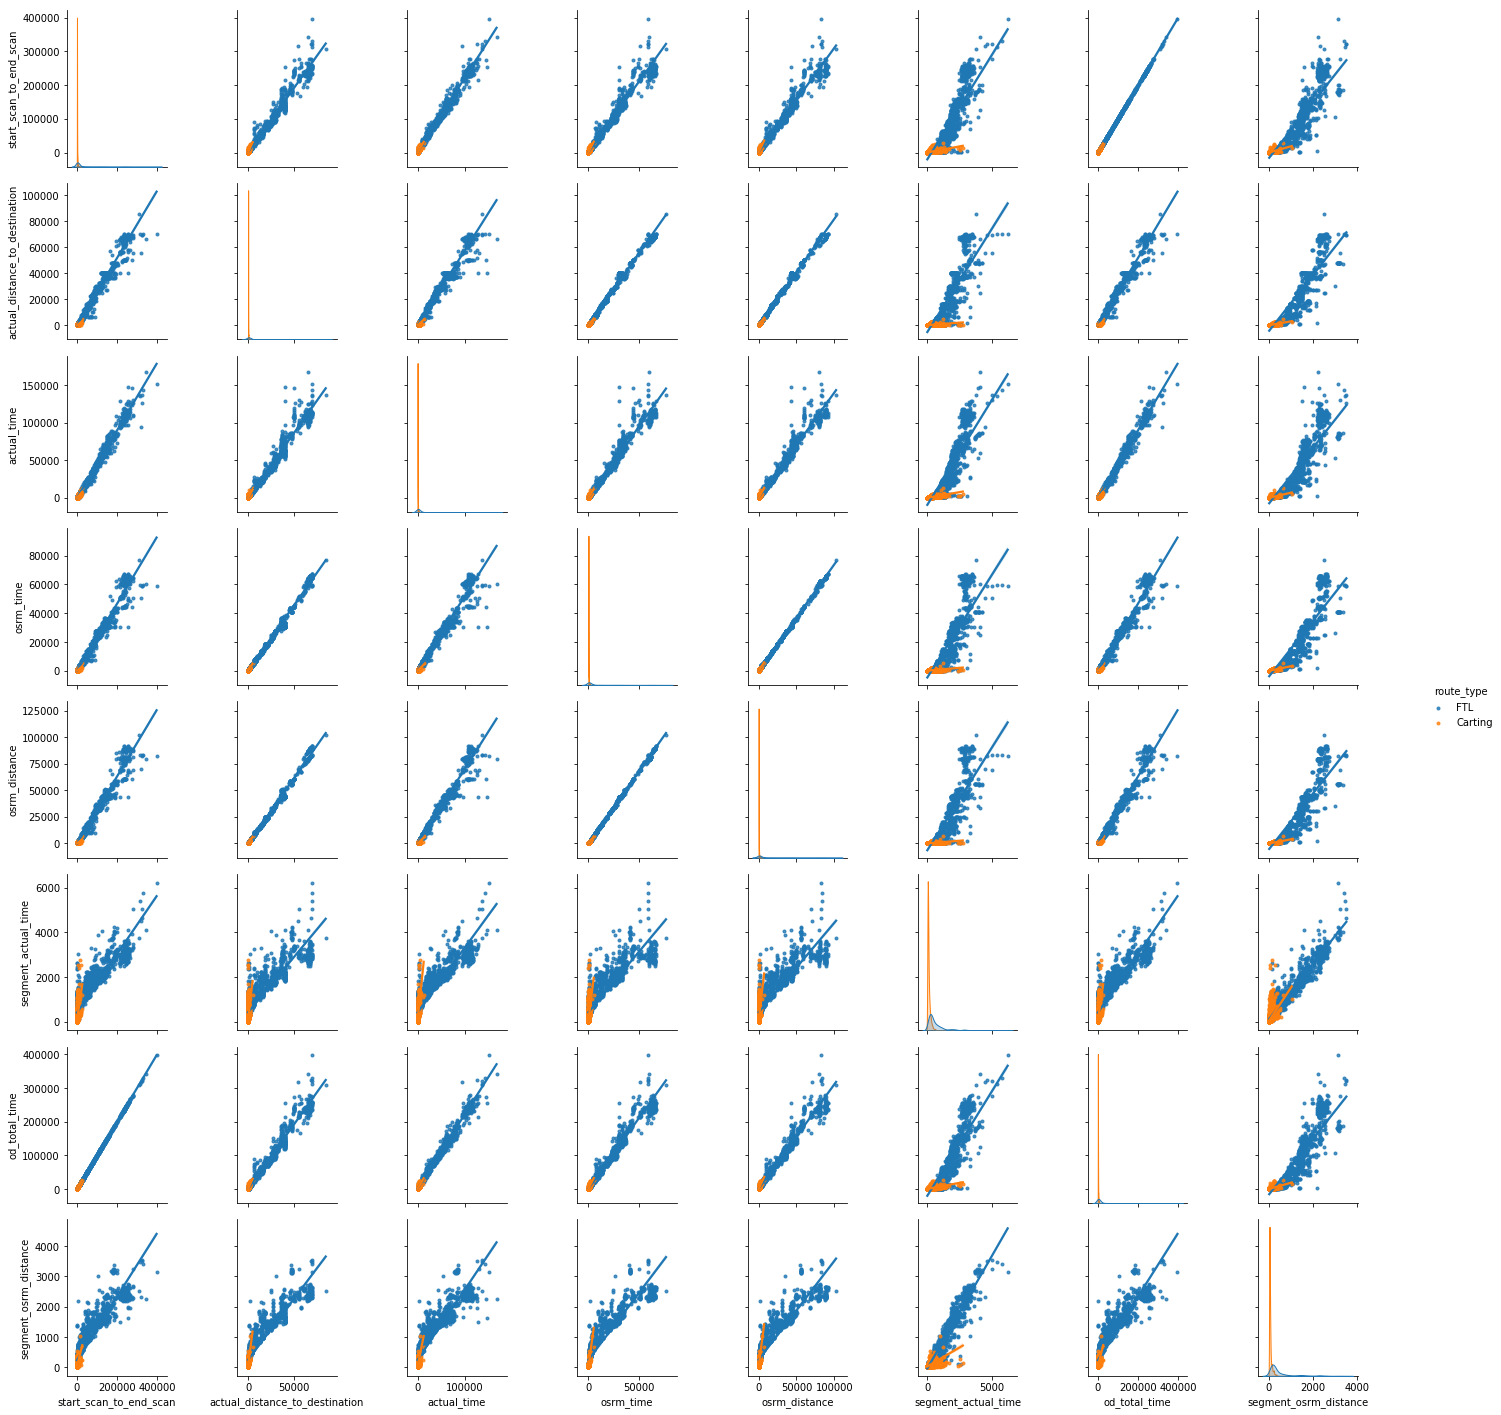

In [323]:
sns.pairplot(data = gdf1,
             vars = num_cols1,
             kind = 'reg',
             hue = 'route_type',
             markers = '.')
plt.show()

South west has greater number of delhivery users.  It can be seen in the heat map.

While delhivery needs its footprints in north east and north states.

# Outliers detection and treatement

In [278]:
gdf1.describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,14787.0,9405.355853,33734.920594,26.000000,406.000000,980.000000,2814.000000,396800.000000
od_total_time,14787.0,9410.195734,33740.947636,26.500000,407.960000,982.900000,2823.135000,396834.500000
actual_distance_to_destination,14787.0,2290.673675,8806.795817,9.002461,49.580093,133.933562,460.606591,85110.885093
actual_time,14787.0,4079.498546,15231.934085,9.000000,142.000000,346.000000,1059.000000,167920.000000
osrm_time,14787.0,2092.831406,7964.769556,6.000000,61.000000,167.000000,510.500000,76953.000000
osrm_distance,14787.0,2786.867034,10769.741065,9.072900,65.635550,172.886300,603.955400,102415.868000
segment_actual_time,14787.0,353.059174,556.365911,9.000000,66.000000,147.000000,364.000000,6230.000000
segment_osrm_time,14787.0,180.511598,314.679279,6.000000,30.000000,65.000000,184.000000,2564.000000
segment_osrm_distance,14787.0,222.705466,416.846279,9.072900,32.578850,69.784200,216.560600,3523.632400
trip_year,14787.0,2018.000000,0.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000


In [279]:
gdf1.describe(include='object').T

,count,unique,top,freq
trip_uuid,14787,14787,trip-153859933418713784,1
data,14787,2,training,10645
route_schedule_uuid,14787,1497,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,53
route_type,14787,2,Carting,8906
source_center,14787,865,IND000000ACB,937
source_name,14787,865,Gurgaon_Bilaspur_HB (Haryana),937
destination_center,14787,951,IND000000ACB,813
destination_name,14787,951,Gurgaon_Bilaspur_HB (Haryana),813
source_state,14787,29,Maharashtra,2682
source_city,14787,665,Bengaluru,1051


We can see from above describe of numerical features, there is huge gap between 50 percentile and mean, that could only means presence of outliers. We can confirm this from Boxplot.

In [61]:
# num_cols1 = ['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
#             'osrm_distance','segment_actual_time','od_total_time']
# fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
# fig.subplots_adjust(top=1.5)
# sns.boxplot(data=gdf1, y='count', x='start_scan_to_end_scan', palette='deep', ax=axs[0,0])
# sns.boxplot(data=gdf1, y='count', x='actual_distance_to_destination', palette='deep', ax=axs[0,1])
# sns.boxplot(data=gdf1, y='count', x='actual_time', palette='deep', ax=axs[1,0])
# sns.boxplot(data=gdf1, y='count', x='osrm_time', palette='deep', ax=axs[1,1])
# plt.show()


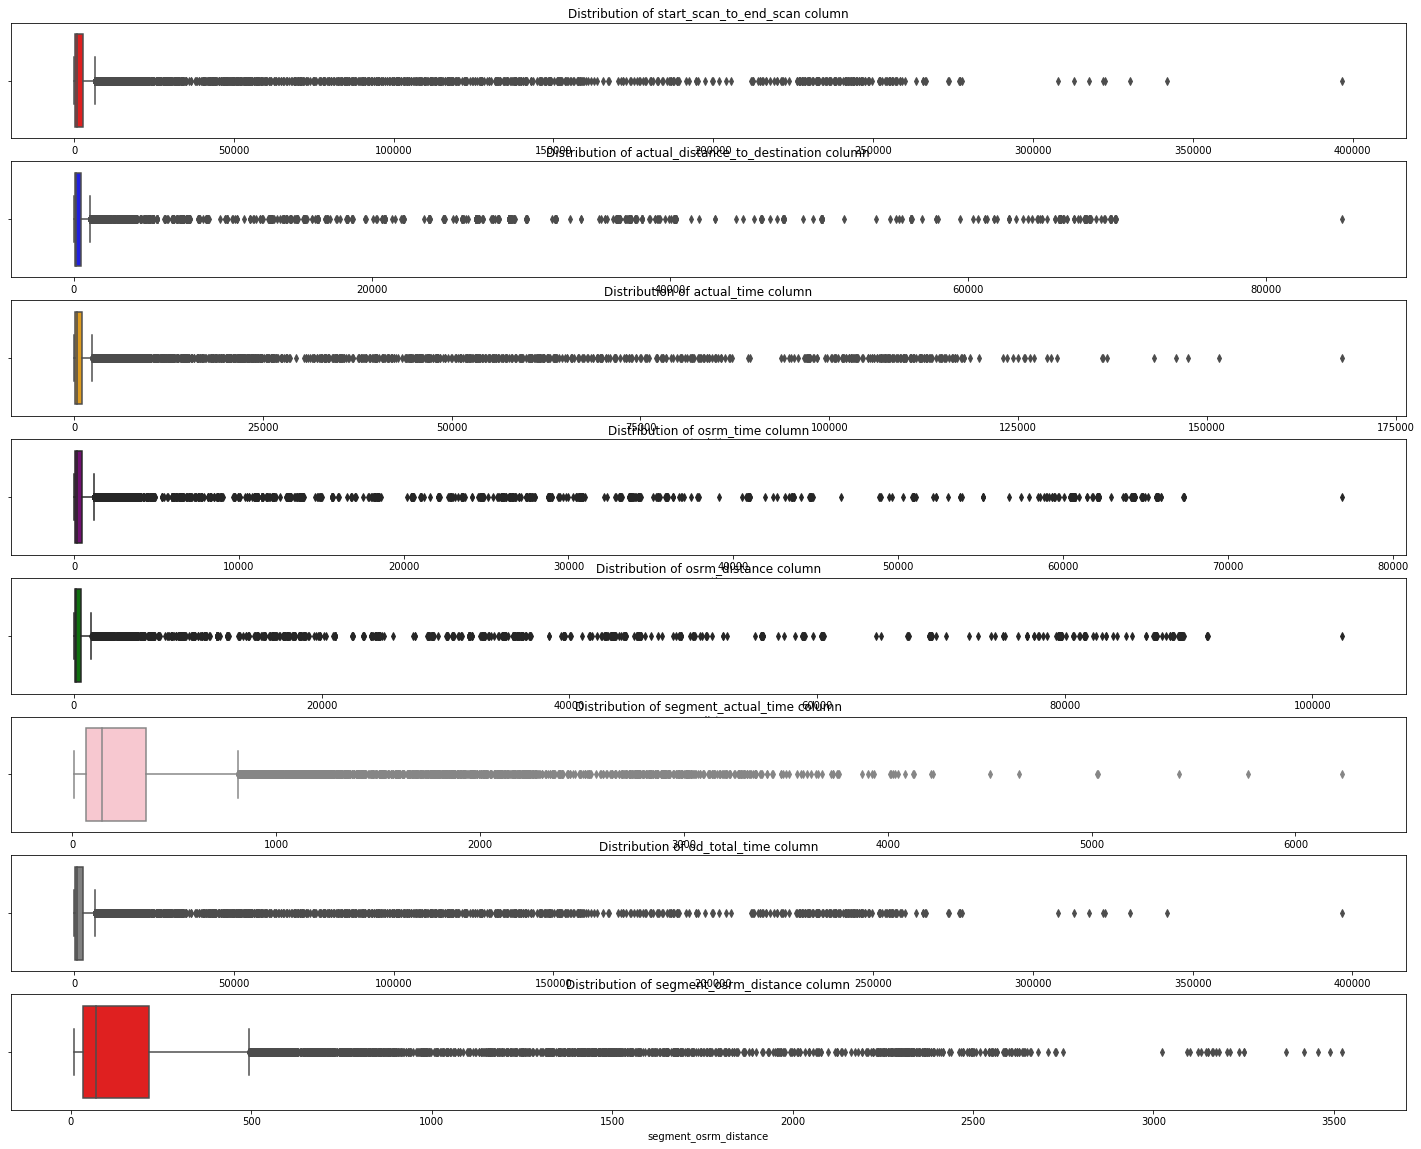

In [282]:
num_cols1 = ['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
             'osrm_distance','segment_actual_time','od_total_time','segment_osrm_distance']
plt.figure(figsize = (25, 20))
for i in range(len(num_cols1)):
    plt.subplot(8, 1, i + 1)
    clr = ['red','blue','orange','purple','green','pink','grey','red']
    sns.boxplot(gdf1[num_cols1[i]], color = clr[i])
    plt.title(f"Distribution of {num_cols1[i]} column")
    plt.plot()


There are a lot of outliers in the numerical columns.

In [283]:
def detect_outliers_iqr(data,i):
    q1 = round(np.percentile(data[[i]], 25),3)
    q3 = round(np.percentile(data[[i]], 75),3)
    IQR = q3-q1
    lwr_bound = round(q1-(1.5*IQR),3)
    upr_bound = round(q3+(1.5*IQR),3)
    outliers = data.loc[(data[i] < lwr_bound) | (data[i] > upr_bound)]
    print('Column :', i)
    print(f'Q1 : {q1}')
    print(f'Q3 : {q3}')
    print(f'IQR : {round(IQR,3)}')
    print(f'LB : {lwr_bound}')
    print(f'UB : {upr_bound}')
    print(f"Max value in {i} is {round(np.max(data[i]),3)}")
    print(f"Min value in {i} is {round(np.min(data[i]),3)}")
    print(f"Median value in {i} is {round(np.median(data[i]),3)}")
    print(f"The total number of outliers in {i} is {outliers.shape[0]}")
    print('\n')
    
for i in num_cols1:
    detect_outliers_iqr(gdf1,i)

Column : start_scan_to_end_scan
Q1 : 406.0
Q3 : 2814.0
IQR : 2408.0
LB : -3206.0
UB : 6426.0
Max value in start_scan_to_end_scan is 396800.0
Min value in start_scan_to_end_scan is 26.0
Median value in start_scan_to_end_scan is 980.0
The total number of outliers in start_scan_to_end_scan is 2020


Column : actual_distance_to_destination
Q1 : 49.58
Q3 : 460.607
IQR : 411.027
LB : -566.96
UB : 1077.148
Max value in actual_distance_to_destination is 85110.885
Min value in actual_distance_to_destination is 9.002
Median value in actual_distance_to_destination is 133.934
The total number of outliers in actual_distance_to_destination is 2124


Column : actual_time
Q1 : 142.0
Q3 : 1059.0
IQR : 917.0
LB : -1233.5
UB : 2434.5
Max value in actual_time is 167920.0
Min value in actual_time is 9.0
Median value in actual_time is 346.0
The total number of outliers in actual_time is 2069


Column : osrm_time
Q1 : 61.0
Q3 : 510.5
IQR : 449.5
LB : -613.25
UB : 1184.75
Max value in osrm_time is 76953.0
Min

The outliers in this case study are huge.Also difference betwwen upper bound and max value is huge. So we are going to replace outliers with the median value.

We will preserve the gdf1 and make outliers changes in gdf2.

In [284]:
gdf2=gdf1.copy()

In [293]:
# df["Age"] = np.where(df["Age"] >75, median,df['Age'])
# q1 = round(np.percentile(data[[i]], 25),3)
# q3 = round(np.percentile(data[[i]], 75),3)
# IQR = q3-q1
# lwr_bound = round(q1-(1.5*IQR),3)
# upr_bound = round(q3+(1.5*IQR),3)
# outliers = data.loc[(data[i] < lwr_bound) | (data[i] > upr_bound)]

# q1 = round(np.percentile(gdf2[[i]], 25),3)
# q3 = round(np.percentile(gdf2[[i]], 75),3)
# IQR = q3-q1
# lwr_bound = round(q1-(1.5*IQR),3)
# upr_bound = round(q3+(1.5*IQR),3)
# outliers = data.loc[(data[i] < lwr_bound) | (data[i] > upr_bound)]
    

for i in num_cols1:
    q1 = round(np.percentile(gdf2[[i]], 25),3)
    q3 = round(np.percentile(gdf2[[i]], 75),3)
    IQR = q3-q1
    lwr_bound = round(q1-(1.5*IQR),3)
    upr_bound = round(q3+(1.5*IQR),3)
    median=np.median(gdf2[i])
    condition=((gdf2[i] < lwr_bound) | (gdf2[i] > upr_bound))
    gdf2[i]=np.where(condition, median,gdf2[i])

    

In [294]:
for i in num_cols1:
    detect_outliers_iqr(gdf2,i)

Column : start_scan_to_end_scan
Q1 : 406.0
Q3 : 980.0
IQR : 574.0
LB : -455.0
UB : 1841.0
Max value in start_scan_to_end_scan is 1841.0
Min value in start_scan_to_end_scan is 26.0
Median value in start_scan_to_end_scan is 980.0
The total number of outliers in start_scan_to_end_scan is 0


Column : actual_distance_to_destination
Q1 : 49.58
Q3 : 133.934
IQR : 84.354
LB : -76.951
UB : 260.465
Max value in actual_distance_to_destination is 260.411
Min value in actual_distance_to_destination is 9.002
Median value in actual_distance_to_destination is 133.934
The total number of outliers in actual_distance_to_destination is 0


Column : actual_time
Q1 : 142.0
Q3 : 346.0
IQR : 204.0
LB : -164.0
UB : 652.0
Max value in actual_time is 652.0
Min value in actual_time is 9.0
Median value in actual_time is 346.0
The total number of outliers in actual_time is 0


Column : osrm_time
Q1 : 61.0
Q3 : 167.0
IQR : 106.0
LB : -98.0
UB : 326.0
Max value in osrm_time is 326.0
Min value in osrm_time is 6.0
Med

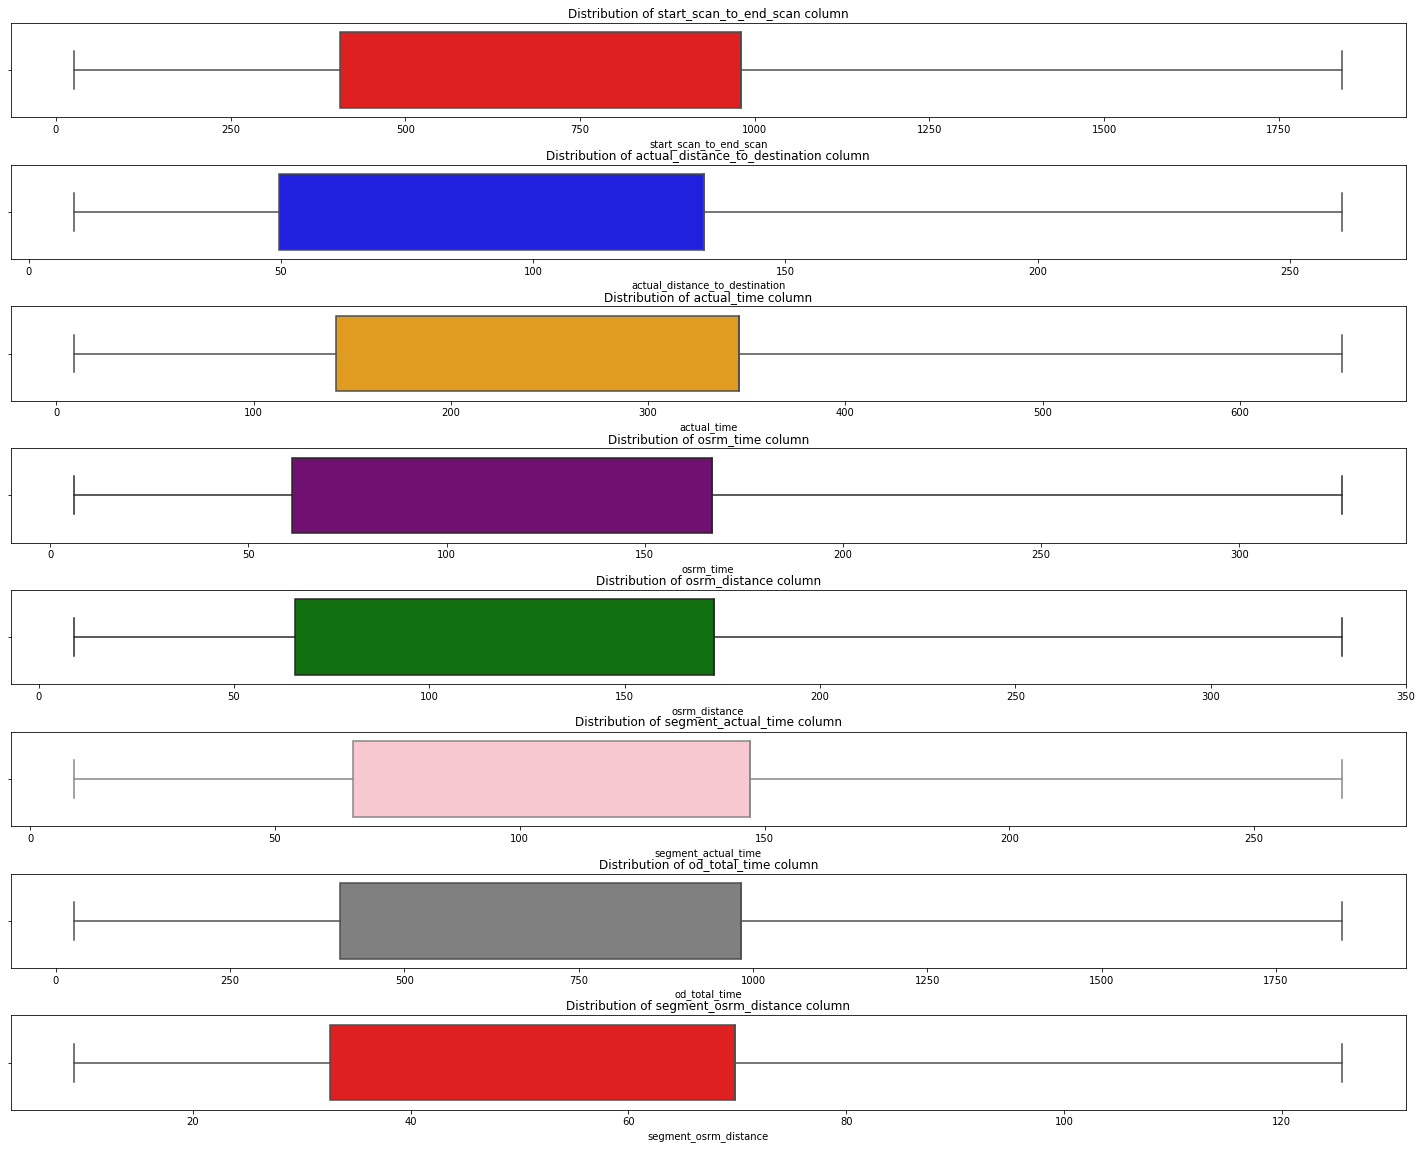

In [296]:
num_cols1 = ['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
             'osrm_distance','segment_actual_time','od_total_time','segment_osrm_distance']
plt.figure(figsize = (25, 20))
for i in range(len(num_cols1)):
    plt.subplot(8, 1, i + 1)
    clr = ['red','blue','orange','purple','green','pink','grey','red']
    sns.boxplot(gdf2[num_cols1[i]], color = clr[i])
    plt.title(f"Distribution of {num_cols1[i]} column")
    plt.subplots_adjust(hspace=0.5)
    plt.plot()


We have replaced all the outliers with the median.

In [75]:
#  gdf1.describe()

In [297]:
gdf2.describe()

,start_scan_to_end_scan,od_total_time,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
count,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.0,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000
mean,773.952458,776.216881,103.919957,270.150876,129.387705,134.280893,118.112193,180.511598,55.171075,2018.0,9.120105,12.456212,18.375127,38.293907,2.920944
std,405.548483,406.189540,57.230801,140.650742,72.410975,73.081447,57.022504,314.679279,24.899095,0.0,0.325096,7.987387,7.882198,0.967366,1.927690
min,26.000000,26.500000,9.002461,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900,2018.0,9.000000,0.000000,1.000000,37.000000,0.000000
25%,406.000000,407.960000,49.580093,142.000000,61.000000,65.635550,66.000000,30.000000,32.578850,2018.0,9.000000,4.000000,14.000000,38.000000,1.000000
50%,980.000000,982.900000,133.933562,346.000000,167.000000,172.886300,147.000000,65.000000,69.784200,2018.0,9.000000,14.000000,19.000000,38.000000,3.000000
75%,980.000000,982.900000,133.933562,346.000000,167.000000,172.886300,147.000000,184.000000,69.784200,2018.0,9.000000,20.000000,25.000000,39.000000,5.000000
max,1841.000000,1845.000000,260.411017,652.000000,326.000000,333.716900,268.000000,2564.000000,125.573600,2018.0,10.000000,23.000000,30.000000,40.000000,6.000000


In [298]:
gdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14787 non-null  object        
 1   data                            14787 non-null  object        
 2   trip_creation_time              14787 non-null  datetime64[ns]
 3   route_schedule_uuid             14787 non-null  object        
 4   route_type                      14787 non-null  object        
 5   source_center                   14787 non-null  object        
 6   source_name                     14787 non-null  object        
 7   destination_center              14787 non-null  object        
 8   destination_name                14787 non-null  object        
 9   start_scan_to_end_scan          14787 non-null  float64       
 10  od_total_time                   14787 non-null  float64       
 11  ac

# Handling Categorical variable : One hot encoding(label encoding)

In [299]:
print(gdf2['route_type'].value_counts())
print(gdf2['data'].value_counts())

Carting    8906
FTL        5881
Name: route_type, dtype: int64
training    10645
test         4142
Name: data, dtype: int64


In [300]:
model_encoder=LabelEncoder()
gdf2['route_type']= model_encoder.fit_transform(gdf2['route_type'])
gdf2['data']=model_encoder.fit_transform(gdf2['data'])

In [301]:
print(gdf2['route_type'].value_counts())
print('\n')
print('------------------------------------')
print(gdf2['data'].value_counts())

0    8906
1    5881
Name: route_type, dtype: int64


------------------------------------
1    10645
0     4142
Name: data, dtype: int64


THe catergorical columns 'route_type' and 'data' ,each has just 2 type of values. so label encoding was best option.

# Standarisation and Normalization

In [304]:
#sdf.columns
num_cols2=['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time','osrm_distance','segment_actual_time','od_total_time','segment_osrm_time','segment_osrm_distance']


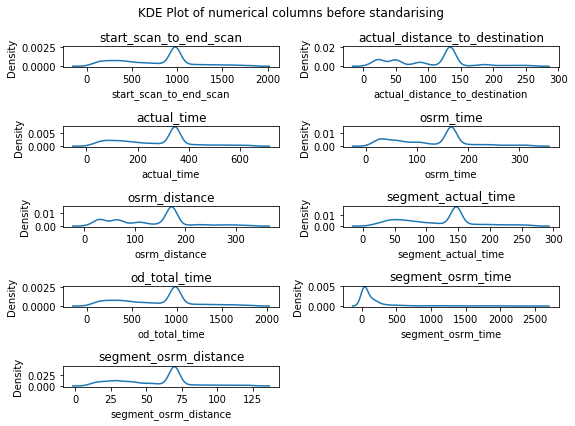

In [306]:
# fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
fig = plt.figure(figsize = (8,6))
plt.suptitle("KDE Plot of numerical columns before standarising", fontsize = 12)
row=5
col=2
itera=1
for i in num_cols2:
    plt.subplot(row,col,itera)
    plt.title(i)
    sns.kdeplot(gdf2[i], palette='deep')
    itera+=1
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [307]:
#standarised gdf2
sdf=gdf2.copy()

In [308]:
scaler = StandardScaler()
sdf=pd.DataFrame(scaler.fit_transform(sdf[num_cols2]),columns=num_cols2)

In [309]:
sdf.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,od_total_time,segment_osrm_time,segment_osrm_distance
count,1.478700e+04,1.478700e+04,1.478700e+04,1.478700e+04,1.478700e+04,1.478700e+04,1.478700e+04,1.478700e+04,1.478700e+04
mean,1.142346e-15,-6.198877e-16,-3.089051e-15,1.117859e-15,2.299813e-15,-9.021135e-16,8.556571e-16,-1.744207e-16,-1.291904e-15
std,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00
min,-1.844361e+00,-1.658560e+00,-1.856796e+00,-1.704049e+00,-1.713324e+00,-1.913558e+00,-1.845794e+00,-5.545885e-01,-1.851462e+00
25%,-9.073265e-01,-9.495184e-01,-9.111591e-01,-9.444703e-01,-9.393309e-01,-9.139191e-01,-9.066441e-01,-4.783178e-01,-9.073819e-01
50%,5.080885e-01,5.244487e-01,5.392911e-01,5.194457e-01,5.282697e-01,5.066207e-01,5.088514e-01,-3.670896e-01,5.869137e-01
75%,5.080885e-01,5.244487e-01,5.392911e-01,5.194457e-01,5.282697e-01,5.066207e-01,5.088514e-01,1.108595e-02,5.869137e-01
max,2.631211e+00,2.734478e+00,2.714966e+00,2.715320e+00,2.729048e+00,2.628662e+00,2.631331e+00,7.574598e+00,2.827609e+00


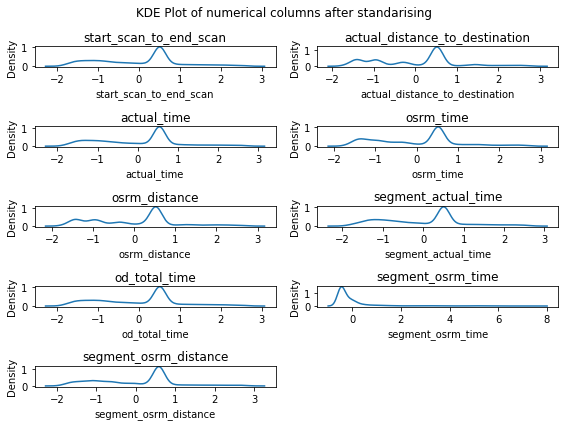

In [310]:
# fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
fig = plt.figure(figsize = (8,6))
plt.suptitle("KDE Plot of numerical columns after standarising", fontsize = 12)
row=5
col=2
itera=1
for i in num_cols2:
    plt.subplot(row,col,itera)
    plt.title(i)
    sns.kdeplot(sdf[i], palette='deep')
    itera+=1
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Hypothesis Testing

## Hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value

Before deciding which testing method we use, we will check its normality using QQ plot and check homogenity of variance using Levene test

In [311]:
sdf[['actual_time', 'osrm_time']].describe()

,actual_time,osrm_time
count,1.478700e+04,1.478700e+04
mean,-3.089051e-15,1.117859e-15
std,1.000034e+00,1.000034e+00
min,-1.856796e+00,-1.704049e+00
25%,-9.111591e-01,-9.444703e-01
50%,5.392911e-01,5.194457e-01
75%,5.392911e-01,5.194457e-01
max,2.714966e+00,2.715320e+00


#### Visual test

[]

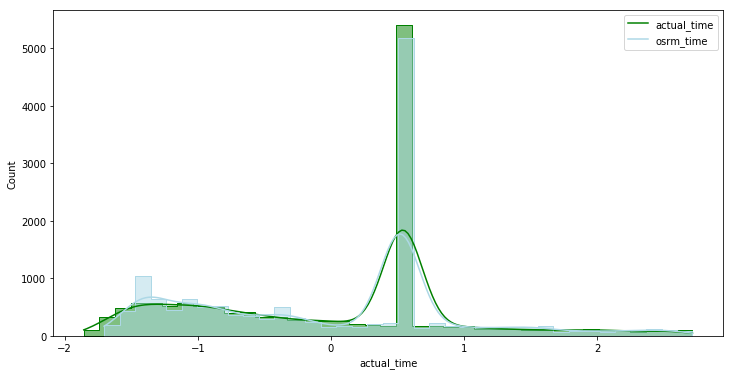

In [144]:
plt.figure(figsize = (12, 6))
sns.histplot(sdf['actual_time'], element = 'step', color = 'green',kde=True)
sns.histplot(sdf['osrm_time'], element = 'step', color = 'lightblue',kde=True)
plt.legend(['actual_time', 'osrm_time'])
plt.plot()

### QQ Plot

In [202]:
# plt.suptitle('QQ plots for actual_time and osrm_time')
# #plt.figure(figsize=[10,6])
# plt.subplot(2,1,1)
# qqplot(sdf['actual_time'],line='r')
# plt.title("actual_time")
# plt.subplot(2,1,2)
# qqplot(sdf['osrm_time'],line='r')
# plt.title("osrm_time")


# plt.show()


In [188]:
# # KS Test


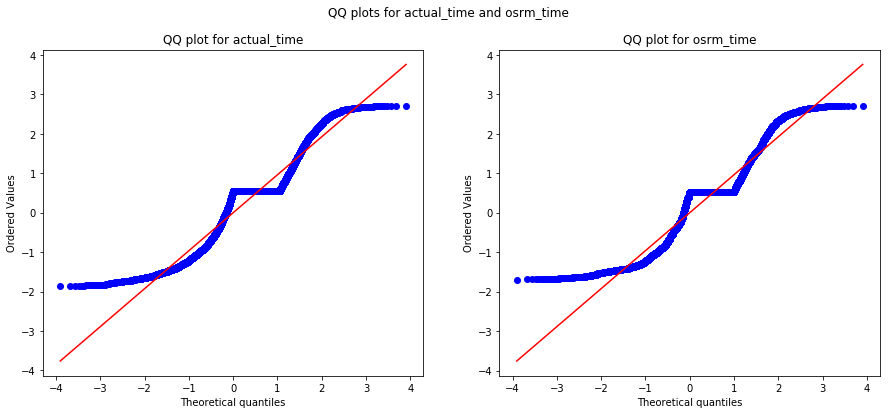

In [205]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and osrm_time')
probplot(sdf['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
probplot(sdf['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.show()

#### Shapiro wilk

In [215]:
test_stat, p_value = shapiro(sdf['actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')    

p-value 1.5414283107572988e-44
The sample does not follow normal distribution


In [216]:
test_stat, p_value = shapiro(sdf['osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')    

p-value 4.624284932271896e-44
The sample does not follow normal distribution


Both samples doesn't follow normal distribution, can be seen from qqplot an d confirmed by shapiro test.

###### Homogenity of variance test

In [324]:
#Null Hypothesis(H0) - Homogenous Variance 
# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = levene(sdf['actual_time'], sdf['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 0.464862870902075
The samples have Homogenous Variance 


###### Since the data at hand is non gaussian we can't use ttest or anova test. so we will use mann whitney U test

### Null Hypothesis
 H0 - actual_time (Total Trip Time) and osrm_time (Expected total trip time) are same.

### Alternate Hypothesis
 HA - actual_time (Total Trip Time) and osrm_time (Expected total trip time) are different.
 
#### alpha
alpha=0.05

if p_value<alpha: we will fail to reject null hypothesis , so we will accept null hypothesis i.e both the features are same.
else: we will reject the null hypothesis.

In [222]:
test_stat, p_value = mannwhitneyu(sdf['actual_time'], sdf['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ') 


p-value 3.2837501848009762e-68
The samples are not similar


# Hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value 

In [227]:
sdf[['actual_time', 'segment_actual_time']].describe()

,actual_time,segment_actual_time
count,1.478700e+04,1.478700e+04
mean,-3.089051e-15,-9.021135e-16
std,1.000034e+00,1.000034e+00
min,-1.856796e+00,-1.913558e+00
25%,-9.111591e-01,-9.139191e-01
50%,5.392911e-01,5.066207e-01
75%,5.392911e-01,5.066207e-01
max,2.714966e+00,2.628662e+00


#### Visual test

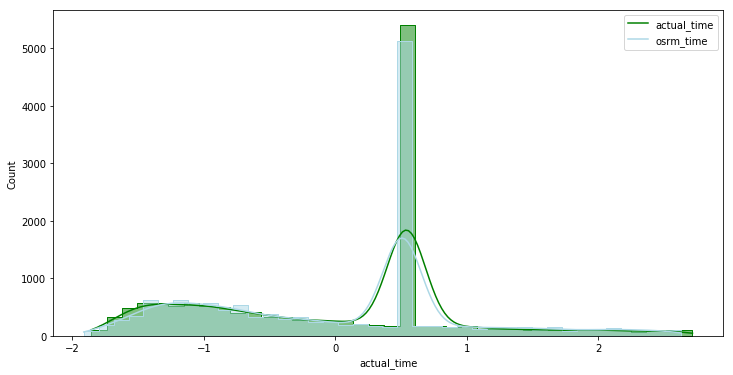

In [229]:
plt.figure(figsize = (12, 6))
sns.histplot(sdf['actual_time'], element = 'step', color = 'green',kde=True)
sns.histplot(sdf['segment_actual_time'], element = 'step', color = 'lightblue',kde=True)
plt.legend(['actual_time', 'osrm_time'])
plt.show()

### QQ Plot

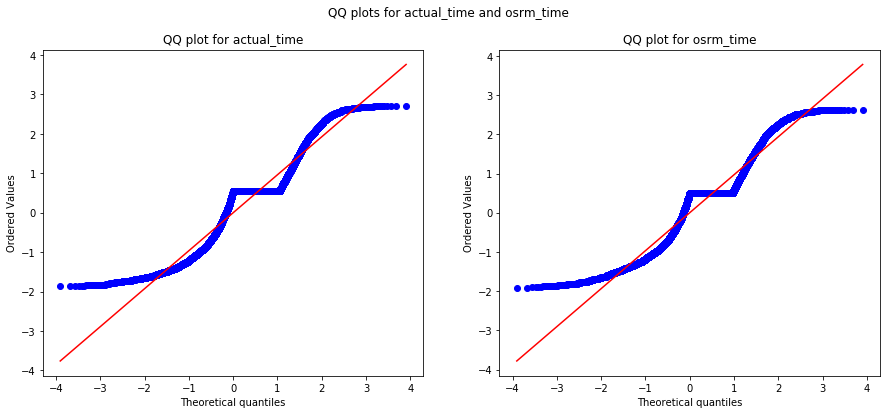

In [230]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and osrm_time')
probplot(sdf['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
probplot(sdf['segment_actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.show()

### Shapiro wilk test for normality

In [231]:
test_stat, p_value = shapiro(sdf['actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')    

p-value 4.344025239406933e-44
The sample does not follow normal distribution


In [232]:
test_stat, p_value = shapiro(sdf['segment_actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')    

p-value 2.8362280917934298e-42
The sample does not follow normal distribution


Both samples doesn't follow normal distribution, can be seen from qqplot an d confirmed by shapiro test.

###### Homogenity of variance test

In [233]:
#Null Hypothesis(H0) - Homogenous Variance 
# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = levene(sdf['actual_time'], sdf['segment_actual_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 0.7299127906653239
The samples have Homogenous Variance 


###### Since the data at hand is non gaussian we can't use ttest or anova test. so we will use mann whitney U test

### Null Hypothesis
 H0 - actual_time (Total Trip Time) and segment_actual_time (cummulative Time taken by the subset of the package delivery) are same.

### Alternate Hypothesis
 HA - actual_time (Total Trip Time) and segment_actual_time are different.
 
#### alpha
alpha=0.05

if p_value<alpha: we will fail to reject null hypothesis , so we will accept null hypothesis i.e both the features are same.
else: we will reject the null hypothesis.

In [234]:
test_stat, p_value = mannwhitneyu(sdf['actual_time'], sdf['segment_actual_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ') 


p-value 1.3543932264948908e-63
The samples are not similar


# Hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value

In [312]:
gdf2[['osrm_distance', 'segment_osrm_distance']].describe()

,osrm_distance,segment_osrm_distance
count,14787.000000,14787.000000
mean,134.280893,55.171075
std,73.081447,24.899095
min,9.072900,9.072900
25%,65.635550,32.578850
50%,172.886300,69.784200
75%,172.886300,69.784200
max,333.716900,125.573600


#### Visual test

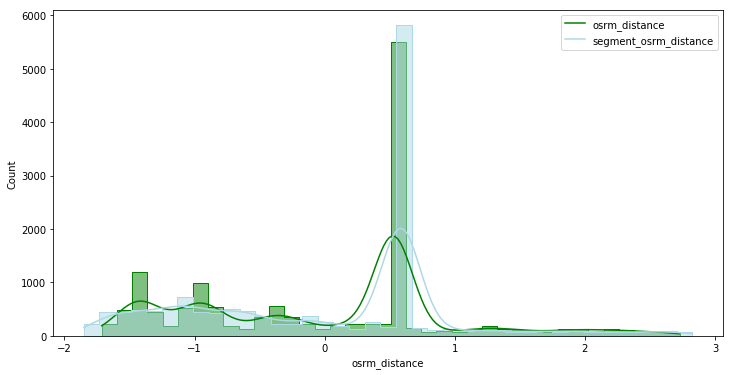

In [314]:
plt.figure(figsize = (12, 6))
sns.histplot(sdf['osrm_distance'], element = 'step', color = 'green',kde=True)
sns.histplot(sdf['segment_osrm_distance'], element = 'step', color = 'lightblue',kde=True)
plt.legend(['osrm_distance', 'segment_osrm_distance'])
plt.show()

### QQ Plot

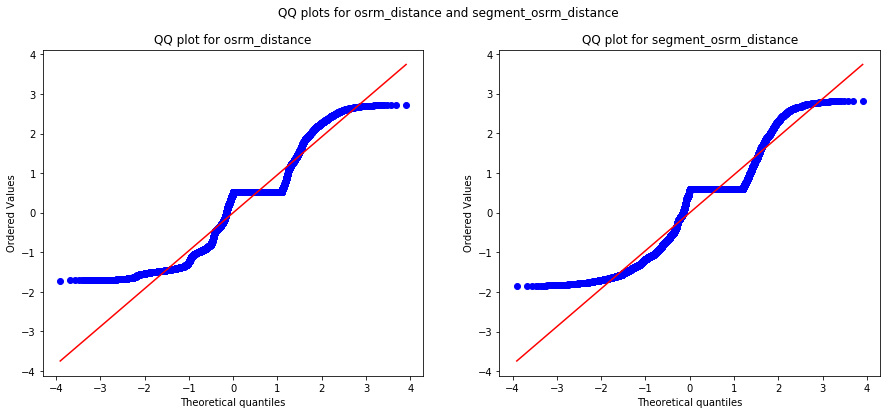

In [315]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_distance and segment_osrm_distance')
probplot(sdf['osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_distance')
plt.subplot(1, 2, 2)
probplot(sdf['segment_osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_distance')
plt.show()

### Shapiro wilk test for normality

In [316]:
test_stat, p_value = shapiro(sdf['osrm_distance'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')    

p-value 0.0
The sample does not follow normal distribution


In [317]:
test_stat, p_value = shapiro(sdf['segment_osrm_distance'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')    

p-value 0.0
The sample does not follow normal distribution


Both samples doesn't follow normal distribution, can be seen from qqplot an d confirmed by shapiro test.

###### Homogenity of variance test

In [318]:
#Null Hypothesis(H0) - Homogenous Variance 
# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = levene(sdf['osrm_distance'], sdf['segment_osrm_distance'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 0.7928217357550458
The samples have Homogenous Variance 


###### Since the data at hand is non gaussian we can't use ttest or anova test. so we will use mann whitney U test

### Null Hypothesis
 H0 - osrm_distance (Total Trip distance) and segment_osrm_distance (Aggregated segment total trip distance) are same.

### Alternate Hypothesis
 HA - osrm_distance (Total Trip distance) and segment_osrm_distance (Aggregated segment total trip distance) are different.
 
#### alpha
alpha=0.05

if p_value<alpha: we will fail to reject null hypothesis , so we will accept null hypothesis i.e both the features are same.
else: we will reject the null hypothesis.

In [319]:
test_stat, p_value = mannwhitneyu(sdf['osrm_distance'], sdf['segment_osrm_distance'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ') 


p-value 8.836920217161183e-90
The samples are not similar


# Hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value 

In [235]:
sdf[['osrm_time', 'segment_osrm_time']].describe()

,osrm_time,segment_osrm_time
count,1.478700e+04,1.478700e+04
mean,1.117859e-15,-1.744207e-16
std,1.000034e+00,1.000034e+00
min,-1.704049e+00,-5.545885e-01
25%,-9.444703e-01,-4.783178e-01
50%,5.194457e-01,-3.670896e-01
75%,5.194457e-01,1.108595e-02
max,2.715320e+00,7.574598e+00


#### Visual test

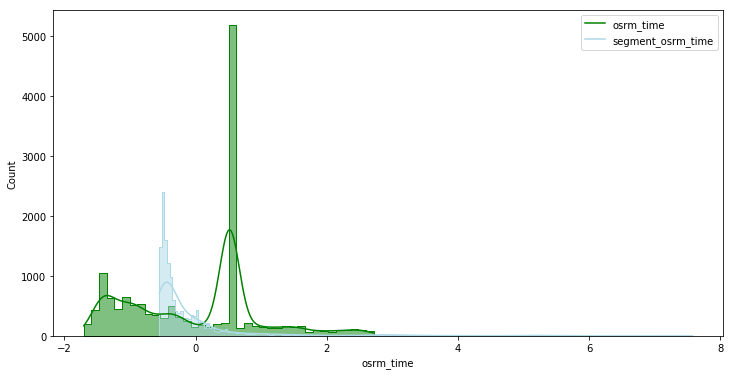

In [237]:
plt.figure(figsize = (12, 6))
sns.histplot(sdf['osrm_time'], element = 'step', color = 'green',kde=True)
sns.histplot(sdf['segment_osrm_time'], element = 'step', color = 'lightblue',kde=True)
plt.legend(['osrm_time', 'segment_osrm_time'])
plt.show()

### QQ Plot

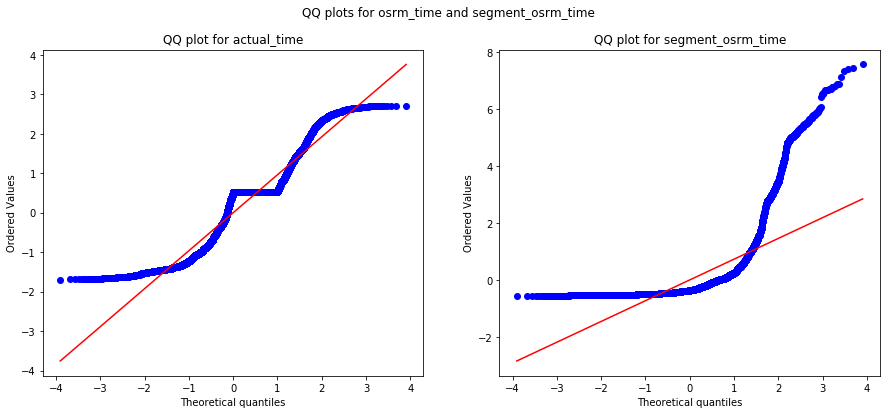

In [238]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_time and segment_osrm_time')
probplot(sdf['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
probplot(sdf['segment_osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_time')
plt.show()

### Shapiro wilk test for normality

In [240]:
test_stat, p_value = shapiro(sdf['osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')    

p-value 8.407790785948902e-45
The sample does not follow normal distribution


In [239]:
test_stat, p_value = shapiro(sdf['segment_osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')    

p-value 0.0
The sample does not follow normal distribution


Both samples doesn't follow normal distribution, can be seen from qqplot an d confirmed by shapiro test.

###### Homogenity of variance test

In [241]:
#Null Hypothesis(H0) - Homogenous Variance 
# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = levene(sdf['osrm_time'], sdf['segment_osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 2.3370703356375285e-264
The samples do not have  Homogenous Variance


###### Since the data at hand is non gaussian we can't use ttest or anova test. so we will use mann whitney U test

### Null Hypothesis
 H0 - osrm_time (Total Trip Time) and segment_osrm_time (segment osrm time aggregated value) are same.

### Alternate Hypothesis
 HA - segment_osrm_time (Total Trip Time) and segment_osrm_time (segment osrm time aggregated value) are different.
 
#### alpha
alpha=0.05

if p_value<alpha: we will fail to reject null hypothesis , so we will accept null hypothesis i.e both the features are same.
else: we will reject the null hypothesis.

In [242]:
test_stat, p_value = mannwhitneyu(sdf['osrm_time'], sdf['segment_osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ') 


p-value 1.9841673714666095e-38
The samples are not similar


# Business Insights

- The data given is of 4 weeks i.e between  '2018-09-12 00:00:16' to '2018-10-08 03:00:24'

- The data we have is of 2018 and that too of 4 weeks only i.e week 37,38,39,40.
- All days of the week have almost same number of booking so no trends here.
- Customer prefer comparatively less booking in midnight and in afternoon. however no trends here too.
- Distribution of data between training and test is 72%-28%.
- Carting has majority of data.
- South west has greater number of delhivery users.  It can be seen in the heat map.
- Maharashtra,Karnataka and Haryana are top states. While Bangalore and Gurgaon are top cities to have its footprints.
- While delhivery needs its footprints in north east and north states.
- Features actual_time & osrm_time are statitically different.
- Features start_scan_to_end_scan and segment_actual_time are statistically similar.
- Features osrm_distance and segment_osrm_distance are statistically different from each other.
- Both the osrm_time & segment_osrm_time are not statistically same.

# Recommendations 

- There is a significant difference between OSRM and actual parameters.
- North, South and West Zones comidors have significant traffic of orders. But, we have a smaller presence in Central, Eastern and North-Eastern zone. However it would be difficult to conclude this, by looking at just 2 months data. It is worth investigating and increasing our presence in these regions.
- From state point of view, we have heavy traffic in Mahrashtra followed by Karnataka. This is a good indicator that we need to plan for resources on ground in these 2 states on priority. Especially, during festive seasons.
- osrm_time and actual_time are different. Team needs to make sure this difference is reduced, so that better delivery time prediction can be made and it becomes convenient for the customer to expect an accurate delivery time.
- The osrm distance and actual distance covered are also not same i.e. maybe the delivery person is not following the predefined route which may lead to late deliveries or the osrm devices is not properly predicting the route based on distance, traffic and other factors. Team needs to look into it.
- Customer segmentation of the customers belonging to the states Maharashtra, Karnataka, Haryana, Tamil Nadu and Uttar Pradesh has to be done to get to know why major orders are coming from these states and to improve customer's buying and delivery experience.
- The osrm prediction needs to be checked since it has a lot of bad prediction. Company needs to root out the cause for bad prediction . or look on to collect data from ground why there is lot of mismatch between actual and osrm.